# Connectionist Bench (Sonar, Mines vs. Rocks)

**Data Source**: https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks  
The task is to train a model to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

# Introduction to data:
<h1>contains 111 patterns obtained, which is nonar singal of a mental cylinder</h1>
<h3>97 pattens obtained from rocks under similar condition</h3>
<h3>spanning 90 degrees for the cylinder and 180 degrees for the rock.</h3>
<h3>Each pattern is a set of 60 numbers in the range 0.0 to 1.0</h3>

In [3]:
col_names = [f"attribute_{i}" for i in range(60)] + ["Class"]

## 1.Load dữ liệu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay

# Saving the model
import pickle



In [3]:
data = pd.read_csv('./Dataset/0_sonar/0_sonar.all-data', header=None)

print(data.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


## 2.Kiểm tra dữ liệu

In [5]:
data.shape

(208, 61)

In [6]:
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

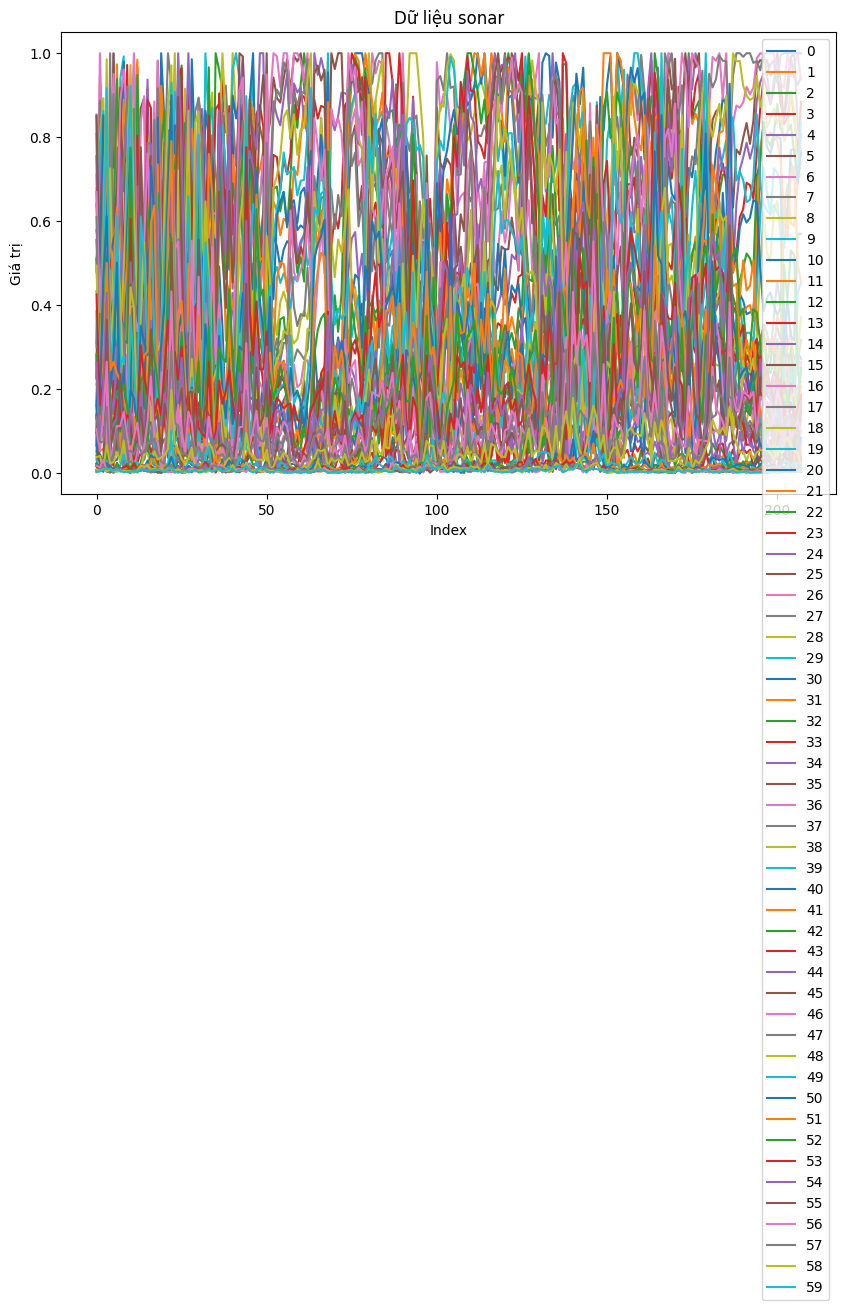

In [8]:
print(data.info())
print(data.describe())


plt.figure(figsize=(10, 6))
dataLoc = data.iloc[:,:1]
dataPlt = plt.plot(data.iloc[:, :-1]) 
plt.title('Dữ liệu sonar')
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.legend(data.columns[:-1], loc='upper right')
plt.show()

    Nhìn nhận: Có thể thấy tập dữ liệu rất dày đặc những con số. Và những con số giao động, chưa nói lên được điều gì nhiều

Tương quan

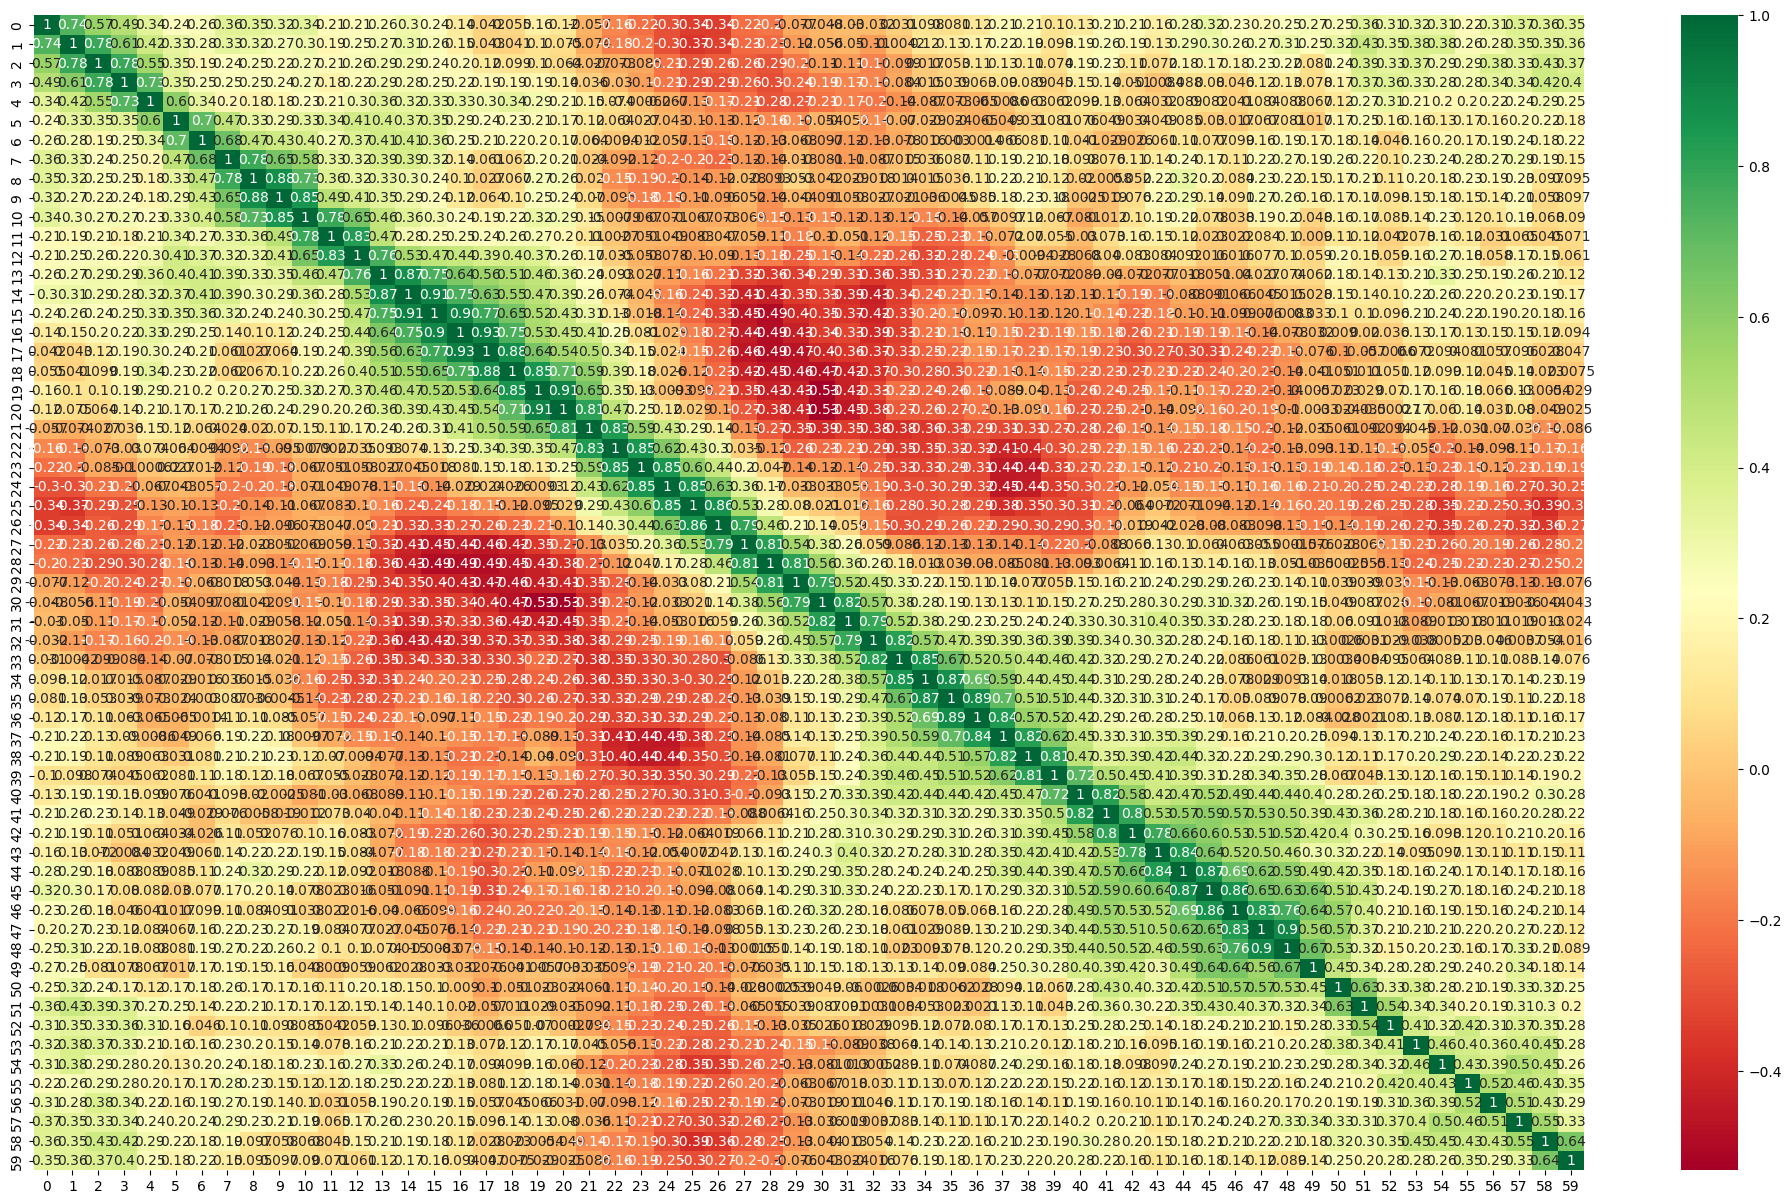

In [9]:
numeric_data = data.select_dtypes(include=['float'])
corr = numeric_data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

## Map

In [10]:
data[60] = data[60].map({'R':0,'M':1})

In [11]:
data[60].dtype

dtype('int64')

In [22]:
corr_matrix = data.corr()
target_corr = corr_matrix[60][:59]

threshold = 0.4
signficant_features = target_corr[abs(target_corr) > threshold]
print(signficant_features)

10    0.432855
Name: 60, dtype: float64


- Tương quan < 0.5 được cho là không tốt. Vậy các feature trên chẳng có tính tương quan mạnh nào với target

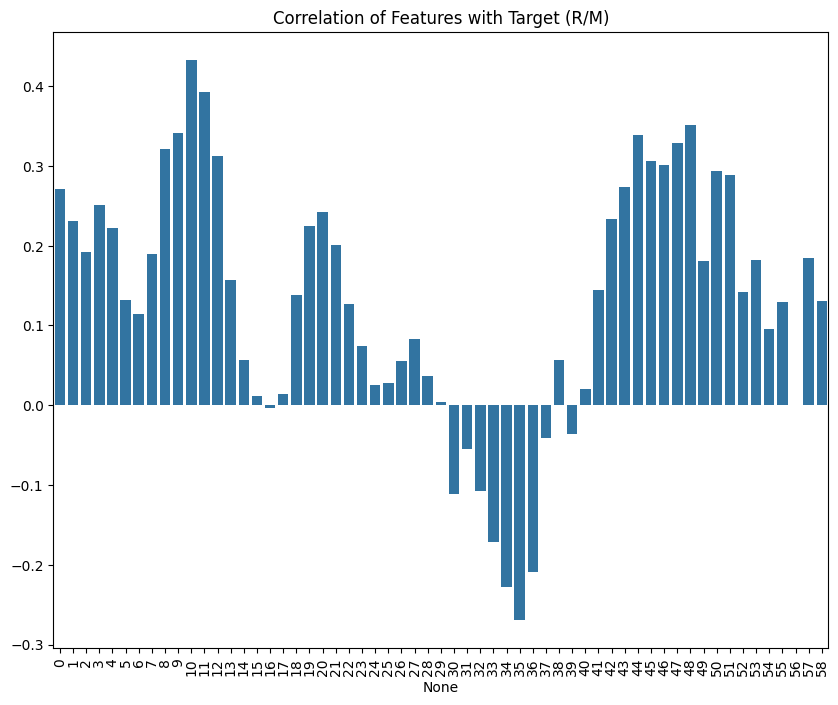

In [23]:

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Target (R/M)')
plt.show()

### Nhận thấy tương quan của các đặc trưng so với target khá là thấp

<p>Nếu để ý, ta sẽ thấy tương quan mạnh ở khoảng 40 đến 52. Màu càng ngả về xanh là thể hiện tương quan tốt.</p>

### Having Overview data info

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

### non column

In [25]:
data.isnull().sum().sum()

0

In [105]:
data.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [114]:
testData = data.copy
testData = data.drop(60, axis=1)
testData

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


### Unique

In [26]:
data[60].unique()

array([0, 1], dtype=int64)

### Value counts each of

In [27]:
data[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

#### => M: 111, R: 97 vậy tạm kết luận số 

### Phân bổ các thuộc tính

<Figure size 2000x1000 with 0 Axes>

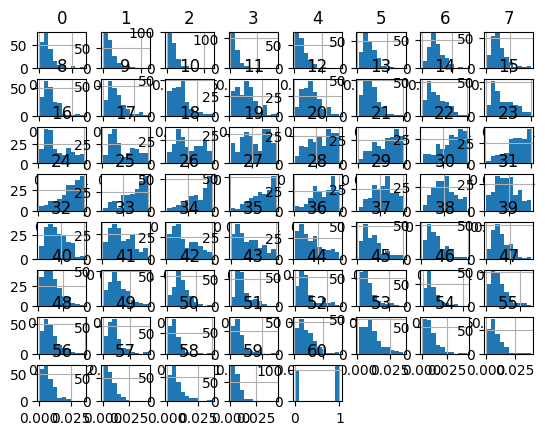

In [33]:
plt.figure(figsize=(20,10))
data.hist()
plt.show()

**Phân bổ trên nói nên điều gì?**
- Có thể nói rằng những trường đầu dữ liệu đang đổ nghiêng quá thấp về 0
- Tuy nhiên ở đoạn giữa của tập dữ liệu có các trường đang phân bố đều ở khoảng 0.3 - 0.4

In [35]:
from pandas.plotting import scatter_matrix

<Figure size 1600x800 with 0 Axes>

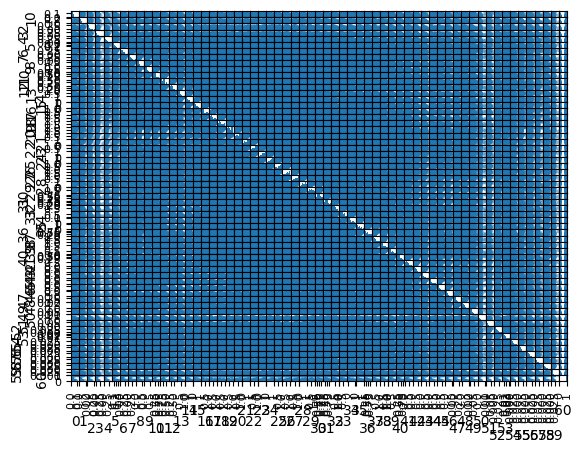

In [39]:
plt.figure(figsize=(20,10), dpi = 80)
scatter_matrix(data)
plt.show()

## 3. Chia dữ liệu thành các tập Train, Val, Test

In [56]:
from sklearn.model_selection import train_test_split


In [70]:
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}')

Train size: 139, Validation size: 31, Test size: 69


### View each of set data train, valid, test

In [85]:
print(data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208, 61)
(139, 60)
(69, 60)
(139,)
(69,)


## 4. Mô hình

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Splitting data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last as features
y = data.iloc[:, -1]   # Last column as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print sizes of training and test sets
print(X.shape, y.shape)
print(f'Train size: {len(X_train)}, Test size: {len(X_test)}')

(208, 60) (208,)
Train size: 139, Test size: 69


**Chọn k**

In [95]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_15 = KNeighborsClassifier(n_neighbors=15)

In [98]:
knn_5.fit(X_train, y_train)
knn_10.fit(X_train, y_train)
knn_15.fit(X_train, y_train)

accuracy_5 = knn_5.score(X_test, y_test)
accuracy_10 = knn_10.score(X_test, y_test)
accuracy_15 = knn_15.score(X_test, y_test)


## 5. Đánh giá mô hình

In [99]:
# Displaying the accuracy results
print(f'Accuracy of KNN (n_neighbors=5): {accuracy_5 * 100:.2f}%')
print(f'Accuracy of KNN (n_neighbors=10): {accuracy_10 * 100:.2f}%')
print(f'Accuracy of KNN (n_neighbors=15): {accuracy_15 * 100:.2f}%')

Accuracy of KNN (n_neighbors=5): 82.61%
Accuracy of KNN (n_neighbors=10): 72.46%
Accuracy of KNN (n_neighbors=15): 72.46%


In [103]:
k_values = [3,7,11,15,19,23,27,31]
accuracy_trains = []
accuracy_tests = []
for k in k_values:
    knnTrain = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_train, y_train)
    knnTest = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test)
    accuracy_trains.append(knnTrain)
    accuracy_tests.append(knnTest)
    

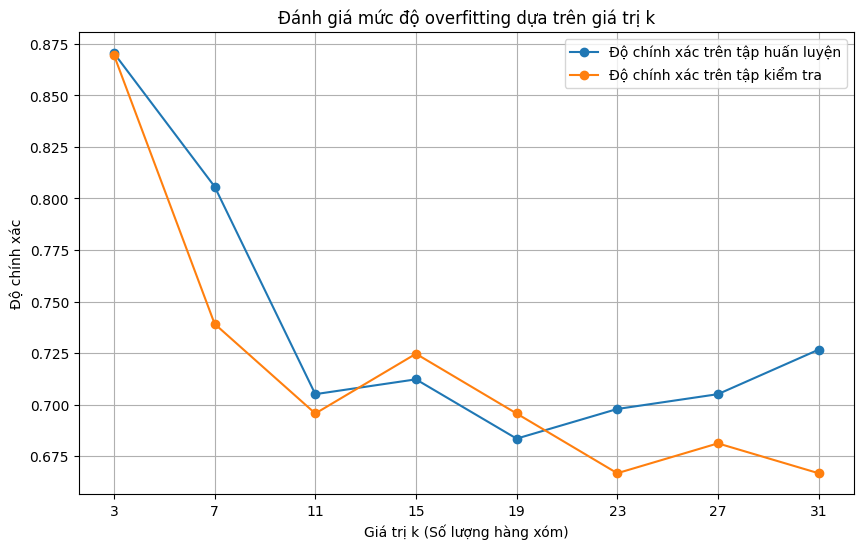

In [104]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_trains, label='Độ chính xác trên tập huấn luyện', marker='o')
plt.plot(k_values, accuracy_tests, label='Độ chính xác trên tập kiểm tra', marker='o')
plt.title('Đánh giá mức độ overfitting dựa trên giá trị k')
plt.xlabel('Giá trị k (Số lượng hàng xóm)')
plt.ylabel('Độ chính xác')
plt.xticks(k_values)  # Đặt các giá trị k trên trục x
plt.legend()
plt.grid(True)
plt.show()

**Có thể thấy mức độ học không phải là quá mức**
 - Nếu tỉ lệ càng giảm khi k tăng có thể nói rằng đây là underfitting
 - Mô hình KNN với giá trị k lớn (ví dụ: k=30) có thể làm mờ các chi tiết quan trọng trong dữ liệu. Điều này xảy ra vì mô hình chỉ nhìn vào số lượng lớn các hàng xóm, dẫn đến việc bỏ qua sự khác biệt nhỏ giữa các điểm dữ liệu, khiến mô hình trở nên quá đơn giản.
Ví dụ: Nếu k quá lớn, mỗi điểm được phân loại dựa trên rất nhiều hàng xóm, ngay cả khi các hàng xóm này đến từ các lớp khác nhau, dẫn đến các dự đoán không chính xác.